# This is an implementation for computing Collision Free Regions in Configuration Space using IRIS

[IRIS in Configuration Space](https://drake.mit.edu/doxygen_cxx/group__geometry__optimization.html#ga3a51e0fec449a0abcf498f78a2a390a8)


This notebook contains code for creating, visualizing and saving such regions.

In [2]:
import sys
import os

if 'google.colab' in sys.modules:
  print("You are in colab")
  !pip install pyngrok drake
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/MyDrive/gcs-motion-planning-main/jupyter_notebooks')

import numpy as np

from pyngrok import ngrok

from pydrake.geometry import ( StartMeshcat )
from pydrake.geometry.optimization import (SaveIrisRegionsYamlFile)

# add parent folders to path
sys.path.append(os.path.abspath('..'))

# Update the import
from src.manipulation import running_as_notebook
from src.auxiliar.auxiliar_functions import (VisualizeConnectivity)
from src.auxiliar.homemade_gcs import GcsTrajOpt
from src.auxiliar.iris_options import create_iris_options
from src.auxiliar.joint_teleop import JointTeleop
from src.auxiliar.helper import VisualizeRegions

You are in colab
Mounted at /content/drive


In [3]:
# Start the visualizer (only run this once).
meshcat = StartMeshcat()
if 'google.colab' in sys.modules:
  # Create a tunnel to the Meshcat server
  ngrok.set_auth_token("2rdws4UBYTqZ1NiiyEbJcWRnByV_7D9Jg8K3YVyZzbFMN1ysg")
  public_url = ngrok.connect(7000, "http")
  print(f"Meshcat is accessible at: {public_url}")

INFO:drake:Meshcat listening for connections at http://localhost:7000


Meshcat is accessible at: NgrokTunnel: "https://bcf3-35-234-20-251.ngrok-free.app" -> "http://localhost:7000"


# Setup



In [4]:
# Get the absolute path of the current working directory
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
data_folder = os.path.join(parent_dir, 'data')

iris_filename = os.path.join(data_folder, 'my_iris.yaml')  # The file to save the regions to

iris_regions = dict() # The regions that we will compute

q = []

iris_options, config = create_iris_options() # Create the options for the iris algorithm

## Run IRIS on manually-specified seeds

In [ ]:
print(config["iris_regions"].keys())
iris_regions = config["iris_regions"]
VisualizeRegions(meshcat, iris_regions, config)

## Joint Teleop

In [6]:
# clear the meshcat visualizer
meshcat.Delete()
meshcat.DeleteAddedControls()


seeds_joint_teleop = []

JointTeleop(meshcat, seeds_joint_teleop, config["iris_regions"], config, q)

Press the 'Stop Joint Teleop' button in Meshcat to continue or press 'Escape'


'Computing region for seed: JointTeleopRegion0'

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace iteration 1
INFO:drake:IrisInConfigurationSpace iteration 2
INFO:drake: Checking final_gripper::collision against shelves::top has already required 30 counter-example searches; still searching...
INFO:drake: Finished checking final_gripper::collision against shelves::top after 30 counter-example searches.
INFO:drake:IrisInConfigurationSpace iteration 3
INFO:drake: Checking final_gripper::collision against shelves::top has already required 30 counter-example searches; still searching...
INFO:drake: Finished checking final_gripper::collision against shelves::top after 30 counter-example searches.
INFO:drake:IrisInConfigurationSpace iteration 4
INFO:drake: Checking final_gripper::collision against shelves::top has already required 30 counter-example searches; still searching...
INFO:drake: Finished checking final_gripper::collision against shelves::top after 30 counter-example searches.
INFO:drake:IrisInCo

'Finished seed JointTeleopRegion0; Computation time: 50.31 seconds'

You found a counter-example!
You found a counter-example!
You found a counter-example!


'Computing region for seed: JointTeleopRegion1'

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace iteration 1
INFO:drake:IrisInConfigurationSpace iteration 2
INFO:drake:IrisInConfigurationSpace iteration 3
INFO:drake:IrisInConfigurationSpace iteration 4
INFO:drake:IrisInConfigurationSpace iteration 5
INFO:drake:IrisInConfigurationSpace: terminating iterations because the seed point is no longer in the region.


'Finished seed JointTeleopRegion1; Computation time: 40.73 seconds'

You found a counter-example!
You found a counter-example!
You found a counter-example!
You found a counter-example!


'Computing region for seed: JointTeleopRegion2'

INFO:drake:IrisInConfigurationSpace iteration 0
INFO:drake:IrisInConfigurationSpace iteration 1
INFO:drake:IrisInConfigurationSpace: terminating iterations because the seed point is no longer in the region.


'Finished seed JointTeleopRegion2; Computation time: 5.71 seconds'

## Visualize the current IRIS region connectivity

For planning trajectories, it's important to have some non-empty intersection between the convex sets. Here is a simple utility the visualization the connectivity as a graph.

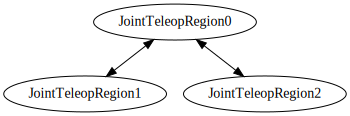

In [7]:
VisualizeConnectivity(config['iris_regions'])

In [ ]:
print(seeds_joint_teleop)

## Plan trajectories with GCS Trajectory Optimization

In [8]:
# clear the meshcat visualizer
meshcat.Delete()
meshcat.DeleteAddedControls()

assert (
    seeds_joint_teleop
), "The examples here use the 'manually-specified seeds' from the section above. Please run that section first, or populate your own start and end configurations."

GcsTrajOpt(seeds_joint_teleop[0], seeds_joint_teleop[1],config["iris_regions"], meshcat)

INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 1 unique paths, discarded 99 duplicate paths.
INFO:drake:Finished 1 rounding solutions with Clp.


GCS solved in 0.0217437744140625 seconds
running animation


# Save your regions back to disk

Note that by default, this notebook will autosave a backup after making each region.

In [ ]:
if running_as_notebook:
    SaveIrisRegionsYamlFile(iris_filename, iris_regions)